In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pygraphon.graphons.StepGraphon import StepGraphon
import numpy as np
from pygraphon.plots.plot_matrices import spy
import matplotlib.pyplot as plt
from pygraphon.utils.utils_graph import edge_density
from tqdm import tqdm

In [3]:
graphon_matrix = np.array([[0.8,0.4,0.4],[0.4,0.8,0.4],[0.4,0.4,0.8]])
graphon = StepGraphon(graphon_matrix,1/3)

In [4]:
print(graphon.integral(graphon_matrix), graphon.integral())

0.5333333333333333 0.9999999999999999


In [5]:
graphon.graphon

array([[1.5 , 0.75, 0.75],
       [0.75, 1.5 , 0.75],
       [0.75, 0.75, 1.5 ]])

In [6]:
from pygraphon.plots.plot_matrices import spy
import matplotlib.pyplot as plt

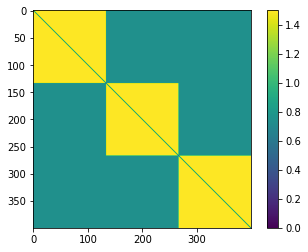

In [7]:
plt.imshow(graphon._get_edge_probabilities(400,False,True))
plt.colorbar()
plt.show()

In [8]:
A = graphon.draw(rho = 0.03,n = 300, exchangeable=False)

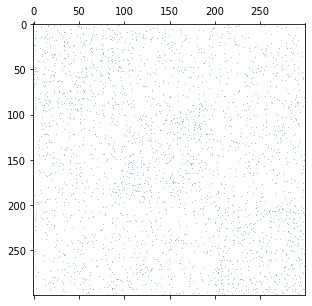

In [9]:
fig, ax = spy(A)
plt.show()

In [10]:
edge_density(A)

0.02882943143812709

In [11]:
print(edge_density(A[0:100,0:100]))
print(edge_density(A[0:100,100:200]))

0.041212121212121214
0.024242424242424242


In [12]:
from pygraphon.estimators.HistogramEstimator import HistogramEstimator
from pygraphon.estimators.MomentEstimator import MomentEstimator, SimpleMomentEstimator

import matlab.engine
eng = matlab.engine.start_matlab()

In [14]:
hist = HistogramEstimator(eng, bandwithHist= 1/3)
hist_epprox = hist.estimate(adjacency_matrix= A)

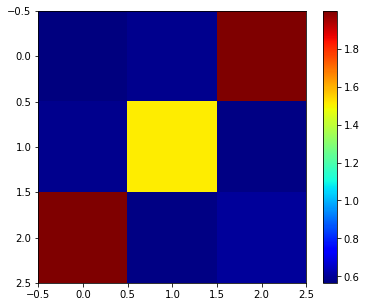

In [15]:
from pygraphon.plots.plots_graphon import plot
plot(hist_epprox)
plt.show()

In [13]:
momsimple = SimpleMomentEstimator(3,eng)
mome_simple_approx = momsimple.estimate(adjacency_matrix= A)

TypeError: __init__() takes 2 positional arguments but 3 were given

In [17]:
momsimple._count_cycles(A)

array([3.04444444e-05, 8.71111111e-07, 2.50534979e-08, 7.62979424e-10,
       2.27813352e-11, 6.74752995e-13, 1.99554659e-14])

In [16]:
from pygraphon.subgraph_isomorphism.CycleCount import CycleCount
counter = CycleCount(eng, L = 9)

In [18]:
pbar = tqdm(total=36)
for rho in tqdm([0.2,0.3,0.4,0.5]):
    for n in [100,200,500]:
        for r in range(3):
            A = graphon.draw(rho = rho,n = n, exchangeable=False)
            count_python = counter.network_profile(adjacency_matrix= A)
            count_matlab = counter(adjacency_matrix= A)
            
            if not np.allclose(count_matlab,count_python):
                print(count_matlab)
                print(count_python)
                
            pbar.update(1)

  0%|          | 0/4 [00:00<?, ?it/s]

[1.e-06 1.e-08 1.e-10 1.e-12 1.e-14 1.e-16 1.e-18]
[7.72200000e-03 4.52879871e-20 1.58685439e-28 5.15362200e-05
 9.55354526e-06 1.76074869e-06 3.17717693e-07]


[1.e-06 1.e-08 1.e-10 1.e-12 1.e-14 1.e-16 1.e-18]
[8.62200000e-03 8.08802294e-20 3.95408692e-28 6.44404080e-05
 1.24073716e-05 2.37317594e-06 4.44795603e-07]


[1.e-06 1.e-08 1.e-10 1.e-12 1.e-14 1.e-16 1.e-18]
[7.54200000e-03 4.09895452e-20 1.29715010e-28 4.92701880e-05
 9.05222752e-06 1.65239986e-06 2.94815173e-07]


[1.250000e-07 6.250000e-10 3.125000e-12 1.562500e-14 7.812500e-17
 3.906250e-19 1.953125e-21]
[7.83750000e-03 3.12538637e-21 6.14187883e-30 5.53075646e-05
 1.05933825e-05 2.01984286e-06 3.82725123e-07]


[1.250000e-07 6.250000e-10 3.125000e-12 1.562500e-14 7.812500e-17
 3.906250e-19 1.953125e-21]
[7.66200000e-03 2.71330760e-21 4.96386921e-30 5.25563107e-05
 9.98066433e-06 1.88677184e-06 3.54442220e-07]


[1.250000e-07 6.250000e-10 3.125000e-12 1.562500e-14 7.812500e-17
 3.906250e-19 1.953125e-21]
[8.15325000e-03 3.89707928e-21 8.74777443e-30 6.02164539e-05
 1.16978471e-05 2.26226015e-06 4.34780798e-07]


  0%|          | 0/4 [00:10<?, ?it/s]


KeyboardInterrupt: 

In [55]:
d = np.sum(A,axis = 0)
unz = np.nonzero(np.sum(A, axis = 0))[0]

In [ ]:
np.sum(A@A@A)

2573106428.0

In [ ]:
np.sum(np.diag(A @ A @ A))

8754438.0

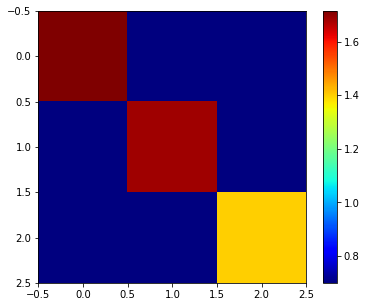

In [ ]:
plot(mome_simple_approx)
plt.show()

In [ ]:
mome_simple_approx.graphon

array([[1.71437621, 0.70034399, 0.70034399],
       [0.70034399, 1.68347843, 0.70034399],
       [0.70034399, 0.70034399, 1.40008141]])

In [ ]:
mome_simple_approx.integral()

1.0000000000000002

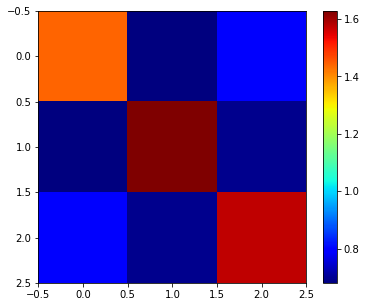

In [ ]:
mom = MomentEstimator(3,eng)
mom_approx = mom.estimate(adjacency_matrix= A)
plot(mom_approx)
plt.show()

In [ ]:
mom_approx.graphon

array([[1.44116679, 0.6810337 , 0.8019572 ],
       [0.6810337 , 1.62785706, 0.694572  ],
       [0.8019572 , 0.694572  , 1.57585037]])

In [ ]:
mom_approx.integral()

1.0000000000000002